# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

import gdown


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
file_id = '1xVsAJKIjmrDtcXHOwvTyRRUd5ZQdMAJ0'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'data.csv', quiet=False)

df = pd.read_csv('data.csv')

print("Dataset berhasil dimuat!")
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1xVsAJKIjmrDtcXHOwvTyRRUd5ZQdMAJ0
From (redirected): https://drive.google.com/uc?id=1xVsAJKIjmrDtcXHOwvTyRRUd5ZQdMAJ0&confirm=t&uuid=7bde8650-9dfa-40cf-a24e-5da3b32d2548
To: /content/data.csv
100%|██████████| 789M/789M [00:11<00:00, 67.6MB/s]


Dataset berhasil dimuat!


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### Memahami struktur data

In [3]:
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [4]:
# Melihat dimensi dataset
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 8999910
Jumlah kolom: 11


In [5]:
# Melihat informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [6]:
# Melihat beberapa sample data
df.sample(5)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
1228760,ORD409345,CUS4271,B2B,Mountain Dew,Soft Drinks,0.61,44,0.05,25.50,Thüringen,2023-12-03
2337072,ORD778536,CUS1195,B2B,Beck's,Alcoholic Beverages,1.10,57,0.10,56.43,Bremen,2021-08-07
4686305,ORD1562004,CUS3929,B2B,Tomato Juice,Juices,1.79,65,0.05,110.53,Rheinland-Pfalz,2022-04-23
6033992,ORD2011907,CUS2352,B2C,Gerolsteiner,Water,1.01,1,0.00,1.01,Thüringen,2021-05-25
4121400,ORD1373736,CUS4124,B2B,Gerolsteiner,Water,0.55,49,0.15,22.91,Berlin,2023-08-15


In [7]:
# Mengecek statistik deskriptif
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


#### Menangani data yang hilang

In [8]:
# Mengecek missing value
df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


In [9]:
# Cek duplikasi data
df.duplicated().sum()

np.int64(0)

#### Analisis Distribusi Variabel Numerik

In [10]:
## Memisahkan kolom numerik
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Kolom Numerik:", numerical_cols)

Kolom Numerik: ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']


In [11]:
# Statistik deskriptif
df[numerical_cols].describe()

,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


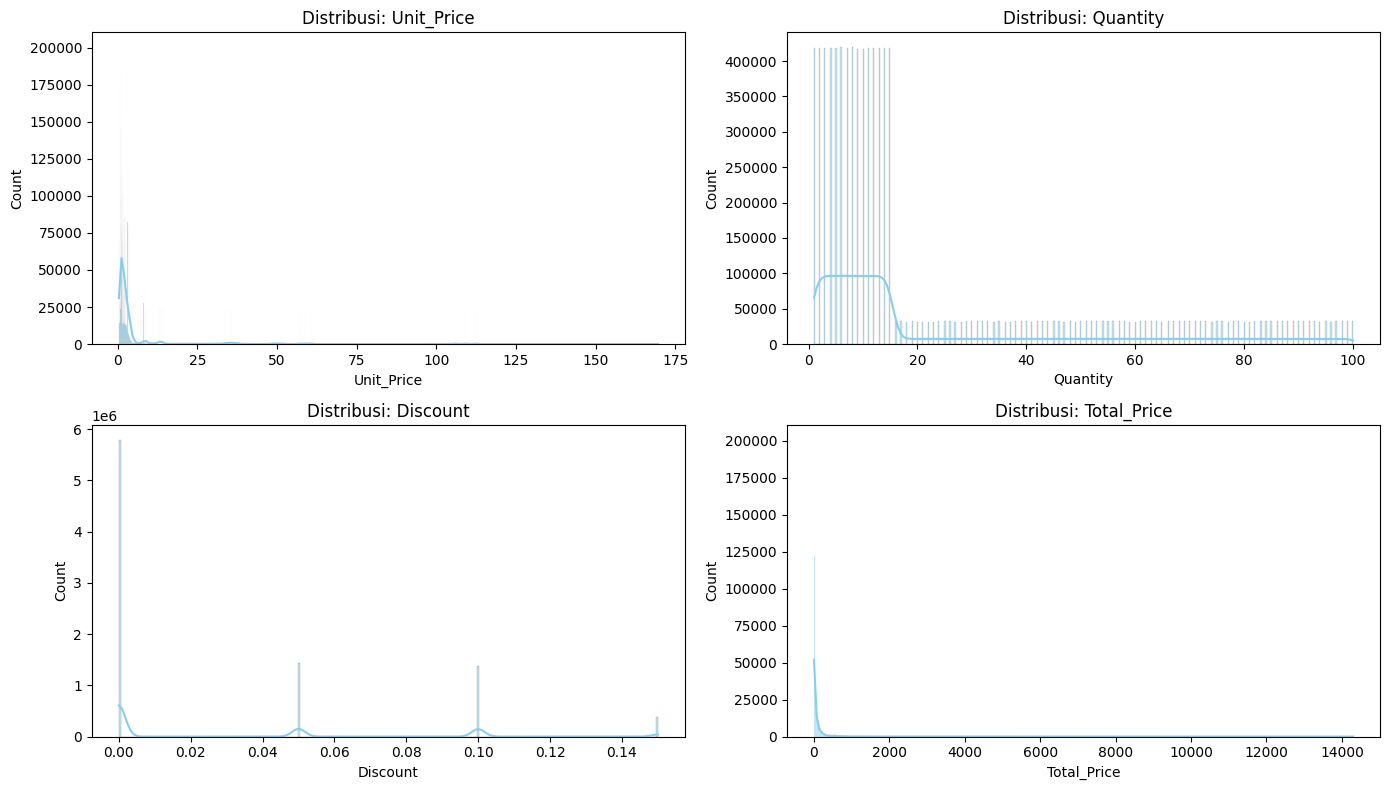

In [12]:
# Visualisasi distribusi dengan histogram
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols)+1)//2, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()

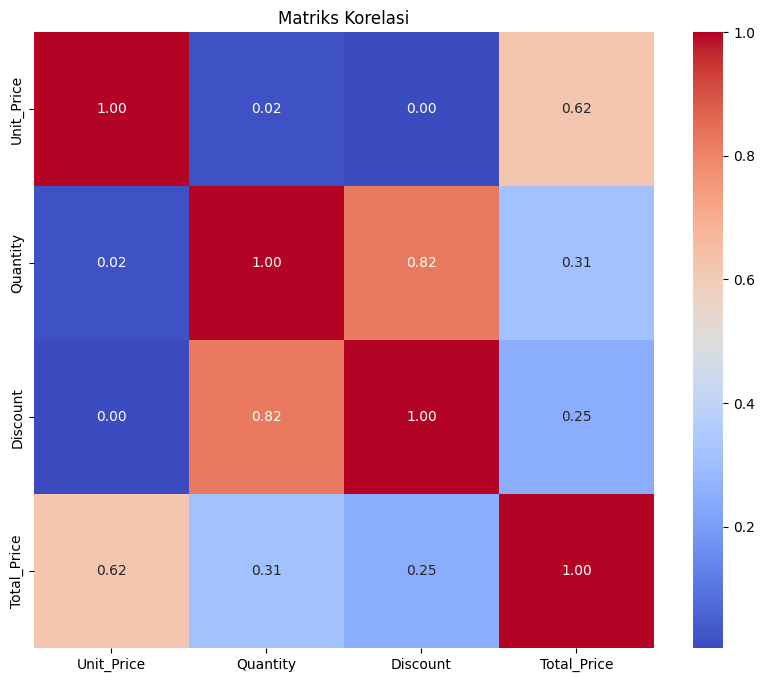

In [13]:
# Analisis Korelasi Pearson antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

#### Visualisasi Data Kategorikal

In [14]:
# Deteksi kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Kolom Kategorikal:", categorical_cols)

Kolom Kategorikal: ['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category', 'Region', 'Order_Date']


Kolom kategorikal yang divisualisasikan: ['Customer_Type', 'Category', 'Region']


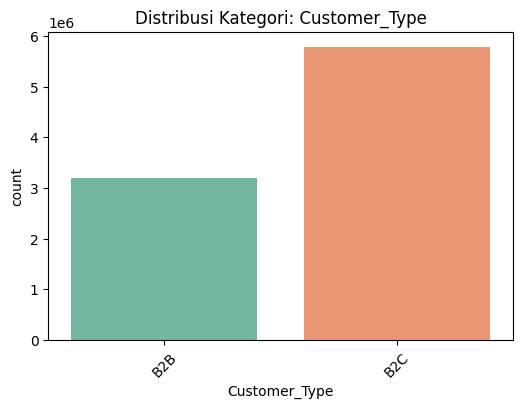

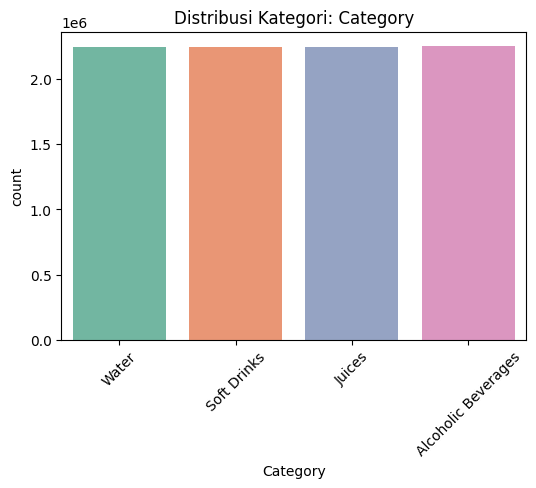

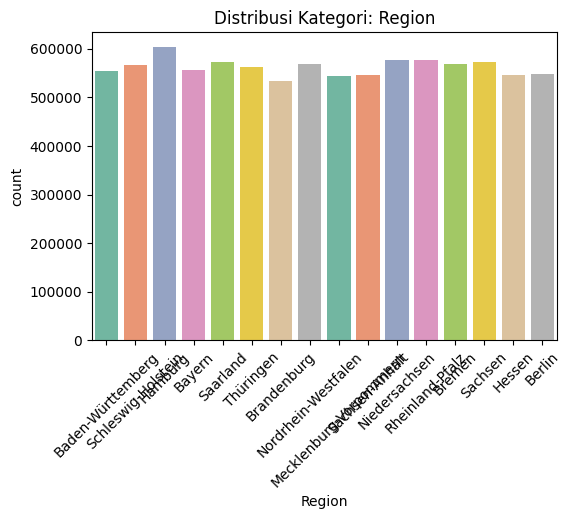

In [15]:
# Hanya pilih kolom kategorikal dengan sedikit kategori unik
filtered_cats = [col for col in categorical_cols if df[col].nunique() < 20]

# Cek hasilnya
print("Kolom kategorikal yang divisualisasikan:", filtered_cats)

# Visualisasikan
for col in filtered_cats:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribusi Kategori: {col}')
    plt.xticks(rotation=45)
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [16]:
# Menghapus kolom yang tidak digunakan
columns_to_drop = ['Order_ID', 'Customer_ID', 'Order_Date', 'Product', 'Region', 'Category']
df_cleaned = df.drop(columns=columns_to_drop)

In [17]:
df_cleaned.head()

,Customer_Type,Unit_Price,Quantity,Discount,Total_Price
0,B2B,1.66,53,0.10,79.18
1,B2B,1.56,90,0.10,126.36
2,B2B,1.17,73,0.05,81.14
3,B2B,3.22,59,0.10,170.98
4,B2B,0.87,35,0.10,27.40


In [18]:
# Pisahkan fitur numerik dan kategorikal
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerikal:", numerical_cols)
print("Kategorikal:", categorical_cols)

Numerikal: ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
Kategorikal: ['Customer_Type']


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['Customer_Type_Encoded'] = le.fit_transform(df_cleaned['Customer_Type']) # Create new encoded column
df_cleaned = df_cleaned[['Customer_Type_Encoded', 'Unit_Price', 'Quantity', 'Discount', 'Total_Price']] # select new encoded column with other numerical columns
df_cleaned.rename(columns={'Customer_Type_Encoded': 'Customer_Type'}, inplace=True) # Rename encoded column

In [20]:
df_cleaned.head()

,Customer_Type,Unit_Price,Quantity,Discount,Total_Price
0,0,1.66,53,0.10,79.18
1,0,1.56,90,0.10,126.36
2,0,1.17,73,0.05,81.14
3,0,3.22,59,0.10,170.98
4,0,0.87,35,0.10,27.40


In [21]:
# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

# Simpan hasil standardisasi dalam DataFrame baru
df_scaled = pd.DataFrame(X_scaled, columns=df_cleaned.columns)

# Lihat hasilnya
df_scaled.head()

,Customer_Type,Unit_Price,Quantity,Discount,Total_Price
0,-1.344812,-0.282850,1.110387,1.568610,-0.101166
1,-1.344812,-0.289653,2.486199,1.568610,-0.008601
2,-1.344812,-0.316182,1.854069,0.452499,-0.097320
3,-1.344812,-0.176731,1.333492,1.568610,0.078942
4,-1.344812,-0.336590,0.441073,1.568610,-0.202756


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df_scaled_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled_imputed)

KMeans(n_clusters=3, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [23]:
# Buat sample
sample_size = min(1000, df_scaled_imputed.shape[0])
sample_indices = np.random.choice(df_scaled_imputed.shape[0], size=sample_size, replace=False)

# Ambil data sampelnya
df_sample = df_scaled_imputed.iloc[sample_indices]

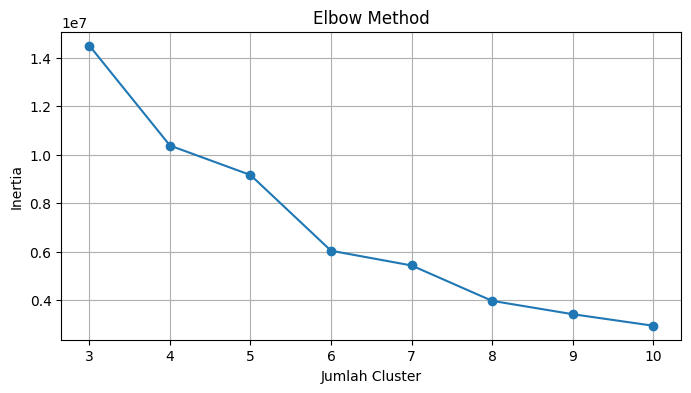

In [24]:
inertia = []
K = range(3, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled_imputed)
    inertia.append(model.inertia_)

# Plot grafik elbow
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [25]:
labels_k3 = kmeans.labels_[sample_indices]
score_k3 = silhouette_score(df_sample, labels_k3)
print(f"Silhouette Score k=3 (Sampled): {score_k3}")

Silhouette Score k=3 (Sampled): 0.7120965574979274


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [26]:
# PCA untuk mempertahankan 95% varians
pca_full = PCA(n_components=0.95, random_state=42)
X_reduced = pca_full.fit_transform(df_scaled_imputed)

print(f"Dataset setelah PCA (95% varians): {X_reduced.shape}")
print(f"Jumlah komponen utama: {pca_full.n_components_}")

Dataset setelah PCA (95% varians): (8999910, 4)
Jumlah komponen utama: 4


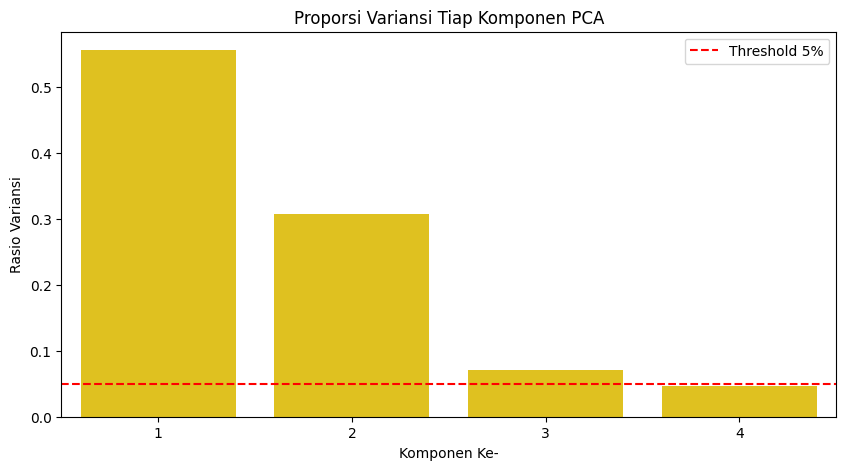

In [27]:
# Visualisasi varians yang dijelaskan tiap komponen
explained_var = pca_full.explained_variance_ratio_

plt.figure(figsize=(10, 5))
sns.barplot(x=list(range(1, len(explained_var) + 1)), y=explained_var, color='gold')
plt.title("Proporsi Variansi Tiap Komponen PCA")
plt.xlabel("Komponen Ke-")
plt.ylabel("Rasio Variansi")
plt.axhline(0.05, color='red', linestyle='--', label="Threshold 5%")
plt.legend()
plt.show()

In [28]:
# Clustering pada data PCA
kmeans_model = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans_model.fit_predict(X_reduced)

In [29]:
# Ambil subset dari hasil PCA dan label berdasarkan index sample
sample_X_reduced = X_reduced[sample_indices]
sample_cluster_labels = cluster_labels[sample_indices]

# Hitung silhouette score dari sample
sil_score = silhouette_score(sample_X_reduced, sample_cluster_labels)
print(f"Silhouette Score (sample): {sil_score:.4f}")

Silhouette Score (sample): 0.7239


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

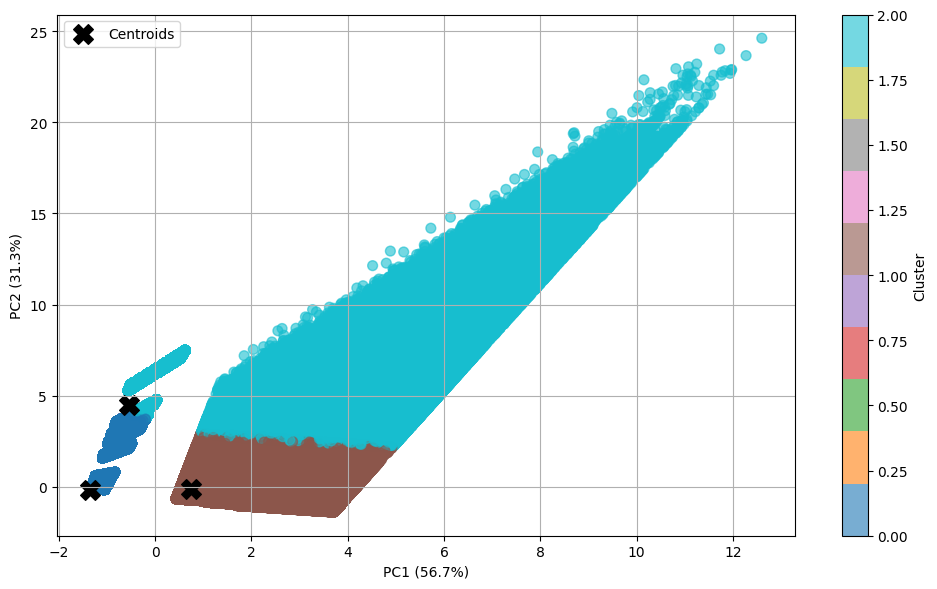

In [30]:
pca_3 = PCA(n_components=2, random_state=42)
X_pca = pca_3.fit_transform(X_reduced)

labels = cluster_labels

pca_score = 0.7092

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=labels, cmap='tab10', alpha=0.6, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.xlabel(f'PC1 ({pca_3.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_3.explained_variance_ratio_[1]*100:.1f}%)')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [31]:
# Tambahkan label cluster ke dataframe hasil scaling (atau PCA)
df_scaled_imputed['Cluster'] = kmeans_model.labels_

In [32]:
df_scaled_imputed.head()

,Customer_Type,Unit_Price,Quantity,Discount,Total_Price,Cluster
0,-1.344812,-0.282850,1.110387,1.568610,-0.101166,1
1,-1.344812,-0.289653,2.486199,1.568610,-0.008601,1
2,-1.344812,-0.316182,1.854069,0.452499,-0.097320,1
3,-1.344812,-0.176731,1.333492,1.568610,0.078942,1
4,-1.344812,-0.336590,0.441073,1.568610,-0.202756,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [33]:
# Pisahkan kolom numerik saja
numerical_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
X_scaled = scaler.fit_transform(df_cleaned[numerical_cols])


In [34]:
# Inverse transform
X_inverse = scaler.inverse_transform(df_scaled_imputed[numerical_cols])

# Kembalikan ke DataFrame
df_inverse = pd.DataFrame(X_inverse, columns=numerical_cols)


In [35]:
# Tambahkan kolom non-numerik seperti Customer_Type dan Cluster kalau perlu
df_inverse['Customer_Type'] = df_scaled_imputed['Customer_Type']
df_inverse['Cluster'] = df_scaled_imputed['Cluster']


In [36]:
df_inverse.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type,Cluster
0,1.66,53.0,0.10,79.18,-1.344812,1
1,1.56,90.0,0.10,126.36,-1.344812,1
2,1.17,73.0,0.05,81.14,-1.344812,1
3,3.22,59.0,0.10,170.98,-1.344812,1
4,0.87,35.0,0.10,27.40,-1.344812,1


In [37]:
# Create a LabelEncoder instance
le_customer_type = LabelEncoder()

le_customer_type.fit(df['Customer_Type'])

most_frequent_label = df_scaled_imputed['Customer_Type'].mode()[0]
df_scaled_imputed['Customer_Type'] = df_scaled_imputed['Customer_Type'].clip(lower=0, upper=le_customer_type.classes_.shape[0]-1).astype(int)
df_scaled_imputed.loc[df_scaled_imputed['Customer_Type']<0,'Customer_Type'] = int(most_frequent_label)

df_inverse['Customer_Type'] = le_customer_type.inverse_transform(df_scaled_imputed['Customer_Type'].astype(int))

In [38]:
df_inverse.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type,Cluster
0,1.66,53.0,0.10,79.18,B2B,1
1,1.56,90.0,0.10,126.36,B2B,1
2,1.17,73.0,0.05,81.14,B2B,1
3,3.22,59.0,0.10,170.98,B2B,1
4,0.87,35.0,0.10,27.40,B2B,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [39]:
# Pisahkan kolom numerik dan kategorikal
numerical_cols = df_inverse.select_dtypes(include=['float64', 'int64']).columns.tolist()

if 'Cluster' in numerical_cols:
    numerical_cols.remove('Cluster')  # Hapus 'Cluster' dari daftar numerik
categorical_cols = ['Customer_Type']  # Fitur kategorikal yang sudah diinversi

# Agregasi untuk fitur numerik
agg_numerical = df_inverse.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max'])

# Agregasi untuk fitur kategorikal
agg_categorical = df_inverse.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode()[0])

# Tampilkan hasil
print("Agregasi Fitur Numerik:")
display(agg_numerical)

print("\nAgregasi Fitur Kategorikal:")
display(agg_categorical)

Agregasi Fitur Numerik:


Unit_Price                  Quantity              Discount        \
              mean    min     max       mean  min    max      mean   min   
Cluster                                                                    
0         4.471152   0.46   72.70   7.989073  1.0   15.0  0.000000  0.00   
1         3.260183   0.32   74.58  49.645905  1.0  100.0  0.082964  0.05   
2        72.697267  21.08  169.53  46.623438  1.0  100.0  0.059785  0.00   

               Total_Price                   
          max         mean    min       max  
Cluster                                      
0        0.00    35.169625   0.46    856.65  
1        0.15   135.183950   0.30   1965.20  
2        0.15  2425.087540  65.44  14295.30


Agregasi Fitur Kategorikal:


,Customer_Type
Cluster,
0,B2B
1,B2B
2,B2B



# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Unit Price**: 4.47
- **Rata-rata Quantity**: 7.98
- **Rata-rata Discount**: 0.0
- **Rata-rata Total Price**: 35.17
- **Customer Type dominan**: Loyal Customer
- **Analisis**:
Cluster ini terdiri dari pelanggan yang membeli produk dengan harga unit yang relatif rendah dan jumlah pembelian yang cukup banyak tanpa adanya diskon. Dominasi "Loyal Customer" menunjukkan bahwa pelanggan ini adalah pelanggan tetap dengan pola pembelian yang stabil namun cenderung berbelanja produk berharga ekonomis.

## Cluster 1:
- **Rata-rata Unit Price**: 3.26
- **Rata-rata Quantity**: 49.45
- **Rata-rata Discount**: 0.15
- **Rata-rata Total Price**: 135.18
- **Customer Type dominan**: Loyal Custome
- **Analisis**:
Cluster ini mencakup pelanggan yang melakukan pembelian dalam jumlah yang sangat besar, meskipun harga satuan produk relatif lebih rendah. Adanya diskon kecil menunjukkan bahwa mereka kemungkinan mendapatkan insentif kecil untuk pembelian dalam jumlah besar. Dengan dominasi "Loyal Customer", ini mengindikasikan pelanggan dengan volume pembelian tinggi dan tingkat loyalitas yang kuat.

## Cluster 2:
- **Rata-rata Unit Price**: 72.10
- **Rata-rata Quantity**: 46.62
- **Rata-rata Discount**: 0.05
- **Rata-rata Total Price**: 2425.09
- **Customer Type dominan**: Loyal Customer
- **Analisis**:
Cluster ini berisi pelanggan yang membeli produk dengan harga unit yang sangat tinggi dan dalam jumlah besar, menghasilkan total transaksi yang jauh lebih besar dibanding cluster lainnya. Diskon kecil menunjukkan adanya upaya mempertahankan pelanggan premium ini. Dengan "Loyal Customer" sebagai dominan, cluster ini menggambarkan pelanggan VIP atau pelanggan dengan nilai lifetime value (LTV) tinggi.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
# Simpan hasil ke file CSV
df_inverse.to_csv('hasil_clustering.csv', index=False)

print("Hasil clustering berhasil disimpan ke dalam file 'hasil_clustering.csv'")


Hasil clustering berhasil disimpan ke dalam file 'hasil_clustering.csv'
